# Trump Fact Check Claims Analysis
The notebook analyzes the claims data for Trump-related topics. The dataset is downloaded from the Google Fact Check Tools API using "trump" as the search query. The scraping was performed on 2025-02-18.

In [ ]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.util import load_claims_from_file, convert_claims_to_dataframe

In [ ]:
claims = load_claims_from_file('../data/raw/trump.json')
df = convert_claims_to_dataframe(claims)

display(df.head(10))

,text,claimant,claimDate,publisherName,publisherSite,reviewUrl,reviewTitle,reviewDate,textualRating
0,Video shows Trump urging U.K. to 'secure borde...,Instagram,NaT,Logically Facts,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/n...,Fact-check: Video showing Trump addressing peo...,2025-02-18 00:00:00+00:00,Fake
1,Image shows Trump’s leaked hospital form after...,social media,2025-02-08 00:00:00+00:00,USA Today,usatoday.com,https://www.usatoday.com/story/news/factcheck/...,Image of 'leaked' Trump hospital record is fab...,2025-02-18 17:53:10+00:00,Altered
2,US President Donald Trump's late mother said t...,"Facebook,Twitter,WhatsApp",2025-02-18 06:48:44+00:00,The Quint,thequint.com,https://www.thequint.com/news/webqoof/donald-t...,Fact-Check: Did US Prez Donald Trump's Mother ...,2025-02-18 06:48:44+00:00,False
3,Video shows Trump’s new Marine One aircraft,Social Media,2025-02-01 00:00:00+00:00,NewsMobile,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact...,Fact Check: This Video Does NOT Show Trump’s N...,2025-02-18 00:00:00+00:00,Misleading
4,"""We have office space, it’s occupied by 4%. No...",Donald Trump,2025-02-11 00:00:00+00:00,FactCheck.org,factcheck.org,https://www.factcheck.org/2025/02/trumps-exagg...,Trump's Exaggeration of Federal Work from Home,2025-02-17 00:00:00+00:00,Exaggerated
5,Video shows a US journalist laughing at an Ind...,Social Media Users,2025-02-17 13:09:40+00:00,BOOM Fact Check,boomlive.in,https://www.boomlive.in/fact-check/viral-video...,Old Video Of US Journalist Mocking Indian Repo...,2025-02-17 13:09:40+00:00,Misleading
6,The viral video shows a U.S. journalist mockin...,Social Media User,2025-02-16 00:00:00+00:00,FACTLY,factly.in,https://factly.in/2020-video-of-a-u-s-journali...,2020 video of a U.S. journalist laughing at an...,2025-02-17 00:00:00+00:00,MISLEADING
7,A 2025 survey says Germans named Donald Trump ...,Social media users,2025-02-03 00:00:00+00:00,Logically Facts,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/2...,Poll naming Trump as 'top threat to peace' is ...,2025-02-17 00:00:00+00:00,Misleading
8,"In February 2025 social media posts, U.S. Pres...",None,NaT,Snopes,snopes.com,https://www.snopes.com/fact-check/trump-quotes...,Trump repeats alleged Napoleon quote: 'He who ...,2025-02-17 12:19:34+00:00,True
9,US journalist mocks Indian reporter as he is s...,Viral social media post,2025-02-17 00:00:00+00:00,Newschecker,newschecker.in,https://newschecker.in/fact-check/video-of-us-...,Fact Check: Video Of US Journalist Laughing At...,2025-02-17 00:00:00+00:00,Missing Context


In [ ]:
# Calculate and display the number of null values in each column
null_counts = df.isnull().sum()
print("\nNumber of null values in each column:")
print(null_counts)

# Calculate percentage of null values
null_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of null values in each column:")
print(null_percentages.round(2))

# Display total number of rows
total_rows = len(df)
print(f"\nTotal number of rows: {total_rows}")



Number of null values in each column:
text                0
claimant         3594
claimDate        3657
publisherName     140
publisherSite       0
reviewUrl           0
reviewTitle         0
reviewDate       1730
textualRating       0
dtype: int64

Percentage of null values in each column:
text              0.00
claimant         32.23
claimDate        32.79
publisherName     1.26
publisherSite     0.00
reviewUrl         0.00
reviewTitle       0.00
reviewDate       15.51
textualRating     0.00
dtype: float64

Total number of rows: 11152


In [4]:
df = df.drop_duplicates()

In [ ]:
# Calculate and display the number of null values in each column
null_counts = df.isnull().sum()
print("\nNumber of null values in each column:")
print(null_counts)

# Calculate percentage of null values
null_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of null values in each column:")
print(null_percentages.round(2))

# Display total number of rows
total_rows = len(df)
print(f"\nTotal number of rows: {total_rows}")


Number of null values in each column:
text                0
claimant         2962
claimDate        3024
publisherName     123
publisherSite       0
reviewUrl           0
reviewTitle         0
reviewDate       1331
textualRating       0
dtype: int64

Percentage of null values in each column:
text              0.00
claimant         32.80
claimDate        33.48
publisherName     1.36
publisherSite     0.00
reviewUrl         0.00
reviewTitle       0.00
reviewDate       14.74
textualRating     0.00
dtype: float64

Total number of rows: 9031


## Time Analysis

In [6]:
# Get date ranges for claim dates and review dates
claim_date_range = {
    'earliest': pd.to_datetime(df['claimDate'].min()),
    'latest': pd.to_datetime(df['claimDate'].max())
}

review_date_range = {
    'earliest': pd.to_datetime(df['reviewDate'].min()),
    'latest': pd.to_datetime(df['reviewDate'].max())
}

print("\nClaim Date Range:")
print(f"Earliest: {claim_date_range['earliest']}")
print(f"Latest: {claim_date_range['latest']}")

print("\nReview Date Range:")
print(f"Earliest: {review_date_range['earliest']}")
print(f"Latest: {review_date_range['latest']}")



Claim Date Range:
Earliest: 1958-05-09 00:00:00+00:00
Latest: 2025-02-22 00:00:00+00:00

Review Date Range:
Earliest: 1998-03-03 05:45:00+00:00
Latest: 2025-02-18 17:53:10+00:00


/tmp/ipykernel_2336915/594290348.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['claimDate'].dt.to_period('M')


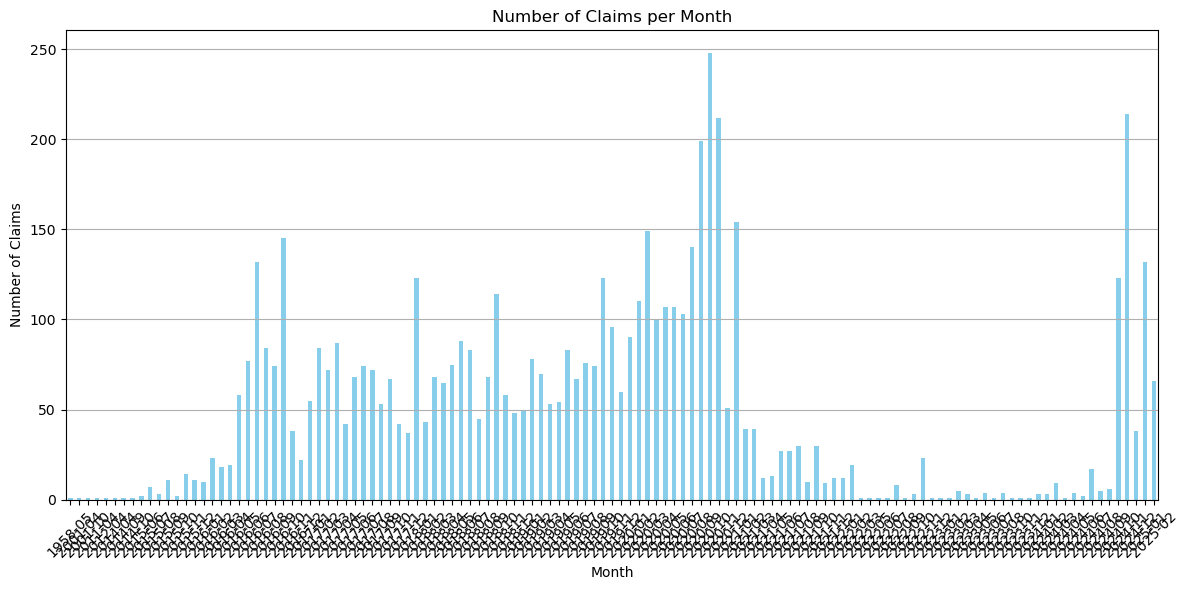

In [7]:
import matplotlib.pyplot as plt

# Convert claimDate to datetime
df['claimDate'] = pd.to_datetime(df['claimDate'])

# Extract month and year from claimDate
df['month_year'] = df['claimDate'].dt.to_period('M')

# Count the number of claims per month
monthly_claims = df['month_year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_claims.plot(kind='bar', color='skyblue')
plt.title('Number of Claims per Month')
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Publisher Analysis

In [10]:
# Create a new DataFrame for publishers and their claim counts
publisher_counts = df['publisherSite'].value_counts().reset_index()
publisher_counts.columns = ['Publisher', 'Number of Claims']

# Count the number of reviews with None publisher
none_publisher_count = df['publisherSite'].isnull().sum()
print(f"Number of reviews with None publisher: {none_publisher_count}")

# Display the top 15 publishers
top_publishers = publisher_counts.head(20)
display(top_publishers)

Number of reviews with None publisher: 0


,Publisher,Number of Claims
0,politifact.com,2285
1,snopes.com,1790
2,factcheck.org,1115
3,washingtonpost.com,750
4,leadstories.com,299
5,nytimes.com,268
6,usatoday.com,219
7,cbsnews.com,169
8,apnews.com,149
9,misbar.com,111


## Rating Analysis

In [9]:
# Group by the rating and count the number of claims for each rating
rating_counts = df['textualRating'].str.lower().value_counts().reset_index()
rating_counts.columns = ['Rating', 'Number of Claims']

# Display the top 20 rating counts
display(rating_counts.head(20))

,Rating,Number of Claims
0,false,2687
1,true,424
2,mostly false,378
3,pants on fire,363
4,four pinocchios,241
5,misleading,229
6,half true,211
7,mostly true,204
8,mixture,199
9,distorts the facts,111
